# How Pollution Data is Reported in Ulaanbaatar

In [176]:
import pandas as pd
import plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('G:\My Drive\Data Science\mds.mplstyle')

In [168]:
with open('G:\My Drive\Data Science\mapbox_key.txt', mode='r') as f:
    mapbox_access_token = f.read()

## Import Data

In [169]:
stations = pd.read_csv('station_list.csv')

In [170]:
stations.head()

,name,name_mn,source,address,lat,lon,type
0,Nisekh,Нисэх,agaar.mn,"Улаанбаатар хот, Хан-Уул дүүрэг, 16-р хороо, Г...",47.863943,106.779094,"PM10, PM2.5, CO, SO2, NO2, O3"
1,Tolgoit,Толгойт,agaar.mn,"Улаанбаатар хот, Сонгинохайрхан дүүрэг, 3-р хо...",47.922495,106.794805,"PM10, PM2.5, CO, SO2, NO2, O3"
2,MNB,МҮОНРТ,agaar.mn,"Улаанбаатар хот, Баянгол дүүрэг, 11-р хороо, М...",47.929732,106.888629,"PM10, PM2.5, CO, SO2, NO2, O3"
3,Amgalan,Амгалан,agaar.mn,"Улаанбаатар хот, Баянзүрх дүүрэг, 8-р хороо, Ө...",47.913429,106.997907,"PM10, PM2.5, CO, SO2, NO2, O3"
4,Misheel Expo,Мишээл экспо,agaar.mn,"Улаанбаатар хот, Хан-Уул дүүрэг, 3-р хороо, Чи...",47.894339,106.882472,"PM10, CO, SO2, NO2, O3"


In [171]:
aqi_table = pd.read_csv('aqi_table.csv')

In [172]:
aqi_table.head()

,concentration,aqi_mn,aqi_us
0,0.0,0,0
1,0.1,0,0
2,0.2,0,1
3,0.3,0,1
4,0.4,1,2


## Interactive Station Map

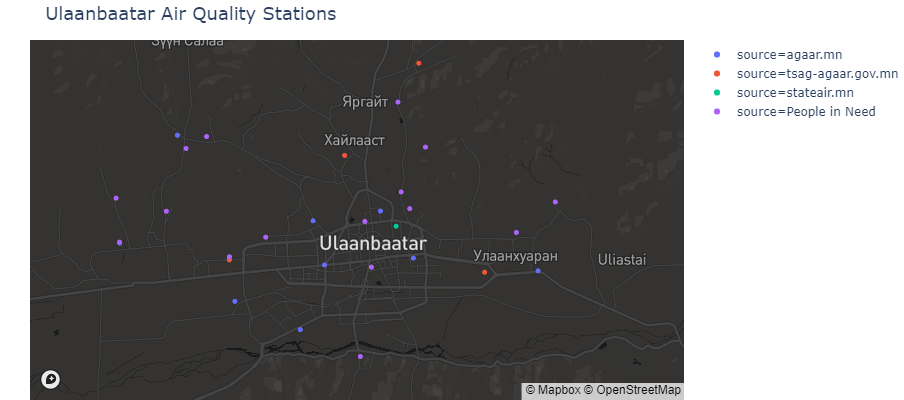

In [173]:
fig = px.scatter_mapbox(stations, lat="lat", lon="lon", hover_name="name", color='source', hover_data=['source','type'], 
                        zoom=10, height=400)
fig.update_layout(
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=47.93,
            lon=106.91
        ),
        pitch=0,
        zoom=10.5,
        style="dark"
    ),
    margin={"r":0,"t":40,"l":30,"b":0},
    title_text='Ulaanbaatar Air Quality Stations',
    title_font_size=18
)

fig.show()
#py.plot(fig, filename='UB Air Quality Monitoring Map')

## March 2019 Update to Ministry of Environment

Link to [Ministry Document](http://agaar.mn/files/article/692/%D0%90%D0%B3%D0%B0%D0%B0%D1%80%D1%8B%D0%BD%20%D1%87%D0%B0%D0%BD%D0%B0%D1%80%D1%8B%D0%BD%20%D0%B8%D0%BD%D0%B4%D0%B5%D0%BA%D1%81%D1%8D%D1%8D%D1%80%20%D0%B0%D0%B3%D0%B0%D0%B0%D1%80%D1%8B%D0%BD%20%D1%87%D0%B0%D0%BD%D0%B0%D1%80%D1%8B%D0%B3%20%D2%AF%D0%BD%D1%8D%D0%BB%D1%8D%D1%85,%20%D0%BC%D1%8D%D0%B4%D1%8D%D1%8D%D0%BB%D1%8D%D1%85%20%D0%B6%D1%83%D1%80%D0%B0%D0%BC.pdf). Link to [EPA Document](https://www3.epa.gov/airnow/aqi-technical-assistance-document-sept2018.pdf).

In [174]:
aqi_table.head()

,concentration,aqi_mn,aqi_us
0,0.0,0,0
1,0.1,0,0
2,0.2,0,1
3,0.3,0,1
4,0.4,1,2


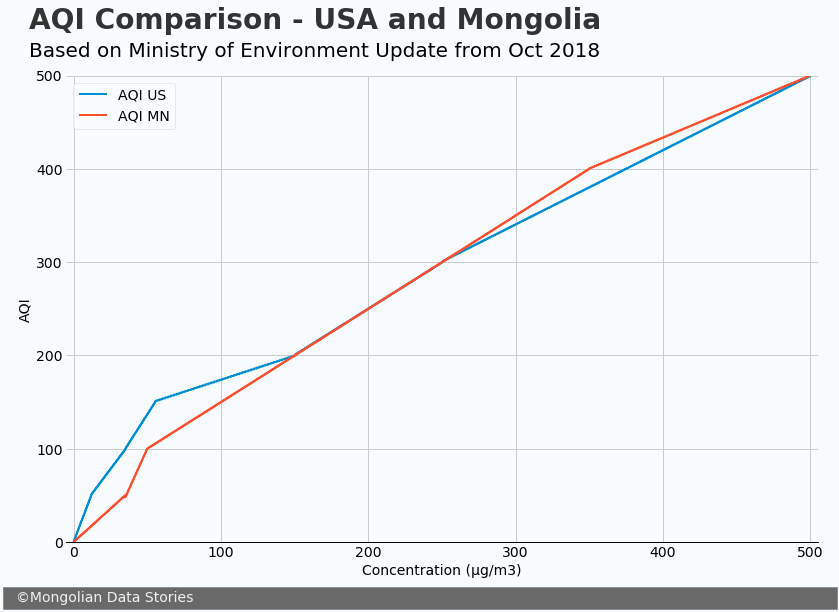

In [190]:
fig, ax = plt.subplots()
ax.plot(aqi_table['concentration'], aqi_table['aqi_us'], linewidth=2)
ax.plot(aqi_table['concentration'], aqi_table['aqi_mn'], linewidth=2)
ax.set_xlabel('Concentration (µg/m3)')
ax.set_ylabel('AQI')
ax.legend(['AQI US', 'AQI MN'],loc=2)
ax.margins(x=.01, y=0)
ax.text(x = -30, y = 550, s = 'AQI Comparison - USA and Mongolia', fontsize=28, weight='bold', alpha=.8)
ax.text(x = -30, y = 520, s= 'Based on Ministry of Environment Update from Oct 2018', fontsize=20)
ax.text(x = -45, y = -64, s = '  ©Mongolian Data Stories                                                                                                                                              ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')
plt.savefig('images/aqi.png', dpi = 300, bbox_inches="tight")

TODO - Show 3 hours moving average vs 1 hour average